<a href="https://colab.research.google.com/github/PrasanthYeddu/Credit-Card-Fraud-Detection/blob/main/Capstone_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection Capstone Project

#### Contributed By : Prasanth Yeddu, Aditi Tomar, Akshat Singh

### Problem Statement:
Credit card fraud is any dishonest act or behaviour to obtain information without the proper authorisation of the account holder for financial gain. Among the different ways of committing fraud, skimming is the most common one. Skimming is a method used for duplicating information located on the magnetic stripe of the card.  Apart from this, other ways of making fraudulent transactions are as follows:

- Manipulation or alteration of genuine cards
- Creation of counterfeit cards
- Stolen or lost credit cards
- Fraudulent telemarketing

In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.



Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. You can learn more about transactional data and the creation of historical variables from the link attached here. You may find this helpful in the capstone project while building the fraud detection model. Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.


### Data Understanding

Data Source: [Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection)

The data set contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from 1 Jan 2019 to 31 Dec 2020. It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions. The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. Now, since the data set is highly imbalanced, it needs to be handled before model building. The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise.

#### Importing required Libraries

In [43]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [44]:
#Reading csv File from stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the Data

In [45]:
ccdf_train = pd.read_csv('/content/drive/MyDrive/Capstone/fraudTrain.csv')
ccdf_test = pd.read_csv('/content/drive/MyDrive/Capstone/fraudTest.csv')
ccdf_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### EDA and Data Preparation

In [46]:
print(ccdf_train.shape)
print(ccdf_test.shape)

(1296675, 23)
(555719, 23)


In [47]:
ccdf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [48]:
ccdf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [49]:
# Dropping Unnamed Column

ccdf_train.drop(['Unnamed: 0'], axis=1, inplace=True)
ccdf_test.drop(['Unnamed: 0'], axis=1, inplace=True)
ccdf_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [50]:
# Converting date columns to datetime format

ccdf_train['trans_date_trans_time'] = pd.to_datetime(ccdf_train['trans_date_trans_time'])
ccdf_train['trans_date'] = ccdf_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
ccdf_train['trans_date'] = pd.to_datetime(ccdf_train['trans_date'])
ccdf_train['dob'] = pd.to_datetime(ccdf_train['dob'])

ccdf_test['trans_date_trans_time'] = pd.to_datetime(ccdf_test['trans_date_trans_time'])
ccdf_test['trans_date'] = ccdf_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
ccdf_test['trans_date'] = pd.to_datetime(ccdf_test['trans_date'])
ccdf_test['dob'] = pd.to_datetime(ccdf_test['dob'])

ccdf_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [51]:
ccdf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [52]:
ccdf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [53]:
# Droppomh fields not necessary for model building

drop_cols = ['cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time']

ccdf_train1 = ccdf_train.drop(drop_cols, axis=1)
ccdf_test1 = ccdf_test.drop(drop_cols, axis=1)

ccdf_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

Text(0.7, 0.5, '0.386%')

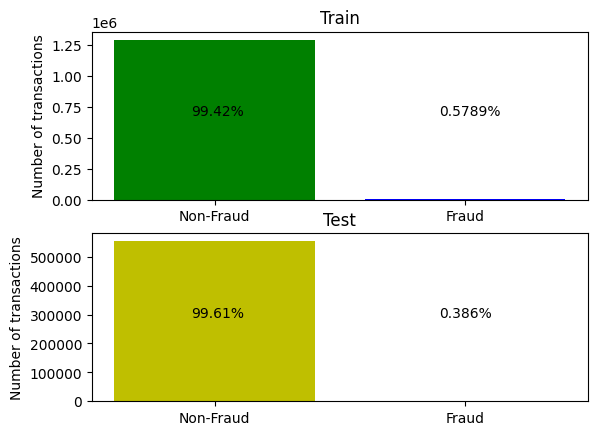

In [54]:
# Checking Class Imbalance

classes_train=df_train1['is_fraud'].value_counts()
normal_share_train=classes_train[0]/ccdf_train1['is_fraud'].count()*100
fraud_share_train=classes_train[1]/ccdf_train1['is_fraud'].count()*100

classes_test=ccdf_test1['is_fraud'].value_counts()
normal_share_test=classes_test[0]/ccdf_test1['is_fraud'].count()*100
fraud_share_test=classes_test[1]/ccdf_test1['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['g','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['y','b'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

In [55]:
# Creating field for age on transaction date

ccdf_train1['trans_age'] = (ccdf_train1['trans_date'] - ccdf_train1['dob']).dt.days / 365.25 # Calculating age in years
ccdf_train1['trans_age'] = ccdf_train1['trans_age'].astype('float') # Converting age into integer

ccdf_test1['trans_age'] = (ccdf_test1['trans_date'] - ccdf_test1['dob']).dt.days / 365.25 # Calculating age in years
ccdf_test1['trans_age'] = ccdf_test1['trans_age'].astype('float') # Converting age into integer

ccdf_train1.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,trans_age
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.814511
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.531143
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.950034
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.969884
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.763860


In [56]:
ccdf_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [57]:
ccdf_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [58]:
fraud_city = pd.DataFrame(ccdf_train1.groupby('city')['is_fraud'].sum())
fraud_city = fraud_city[fraud_city['is_fraud'] > 0]
fraud_city.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [59]:
fraud_state = pd.DataFrame(ccdf_train1.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud'] > 0]
fraud_state.index


Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [60]:
fraud_job = pd.DataFrame(ccdf_train1.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud'] > 0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Veterinary surgeon', 'Video editor', 'Volunteer coordinator',
       'Warden/ranger', 'Warehouse manager', 'Waste management officer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=443)

In [61]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

ccdf_train1['lat_dis'] = abs(round(ccdf_train1['merch_lat'] - ccdf_train1['lat'], 3))
ccdf_train1['long_dis'] = abs(round(ccdf_train1['merch_long'] - ccdf_train1['long'], 3))

ccdf_test1['lat_dis'] = abs(round(ccdf_test1['merch_lat'] - ccdf_test1['lat'], 3))
ccdf_test1['long_dis'] = abs(round(ccdf_test1['merch_long'] - ccdf_test1['long'], 3))

ccdf_train1[['merch_lat', 'lat', 'lat_dis', 'merch_long', 'long', 'long_dis']].head()

,merch_lat,lat,lat_dis,merch_long,long,long_dis
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [62]:
ccdf_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [63]:
# Creating Month column

ccdf_train1['trans_month'] = pd.DatetimeIndex(ccdf_train1['trans_date']).month
ccdf_test1['trans_month'] = pd.DatetimeIndex(ccdf_test1['trans_date']).month

ccdf_train1[['trans_date_trans_time', 'trans_month']].tail()

,trans_date_trans_time,trans_month
1296670,2020-06-21 12:12:08,6
1296671,2020-06-21 12:12:19,6
1296672,2020-06-21 12:12:32,6
1296673,2020-06-21 12:13:36,6
1296674,2020-06-21 12:13:37,6


In [64]:
ccdf_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [65]:
ccdf_train1.nunique()

,0
trans_date_trans_time,1274791
category,14
amt,52928
gender,2
city,894
state,51
lat,968
long,969
city_pop,879
job,494


In [66]:
ccdf_test1.nunique()

,0
trans_date_trans_time,544760
category,14
amt,37256
gender,2
city,849
state,50
lat,910
long,910
city_pop,835
job,478


#### Checking if there are any highly skewed categorical variables

In [67]:
round(ccdf_train1['category'].value_counts()/len(ccdf_train1.index)*100, 2)

,count
category,
gas_transport,10.15
grocery_pos,9.54
home,9.49
shopping_pos,9.00
kids_pets,8.72
shopping_net,7.52
entertainment,7.25
food_dining,7.05
personal_care,7.00


In [68]:
round(ccdf_train1['gender'].value_counts()/len(ccdf_train1.index)*100, 2)

,count
gender,
F,54.74
M,45.26


In [69]:
round(ccdf_train1['city'].value_counts()/len(ccdf_train1.index)*100, 2)

,count
city,
Birmingham,0.43
San Antonio,0.40
Utica,0.39
Phoenix,0.39
Meridian,0.39
...,...
Vacaville,0.00
Claypool,0.00
Karns City,0.00


In [70]:
round(ccdf_train1['state'].value_counts()/len(ccdf_train1.index)*100, 2)

,count
state,
TX,7.32
NY,6.44
PA,6.16
CA,4.35
OH,3.58
MI,3.56
IL,3.34
FL,3.29
AL,3.16


In [71]:
round(ccdf_train1['job'].value_counts()/len(ccdf_train1.index)*100, 2)

,count
job,
Film/video editor,0.75
Exhibition designer,0.71
Naval architect,0.67
"Surveyor, land/geomatics",0.67
Materials engineer,0.64
...,...
Information officer,0.00
Veterinary surgeon,0.00
Ship broker,0.00


In [72]:
ccdf_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [73]:
ccdf_train1.nunique()

,0
trans_date_trans_time,1274791
category,14
amt,52928
gender,2
city,894
state,51
lat,968
long,969
city_pop,879
job,494


In [74]:
# Dropping variables not useful for model building

drop_cols = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'trans_date', 'merch_lat', 'merch_long']

ccdf_train2 = ccdf_train1.drop(drop_cols, axis=1)
ccdf_test2 = ccdf_test1.drop(drop_cols, axis=1)

ccdf_train2.head()

,category,amt,gender,state,city_pop,is_fraud,trans_age,lat_dis,long_dis,trans_month
0,misc_net,4.97,F,NC,3495,0,30.814511,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40.531143,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56.950034,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51.969884,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32.763860,0.254,0.830,1


In [75]:
# Binary mapping on Gender

ccdf_train2['gender'] = ccdf_train2['gender'].map({'M':1, 'F':0})
ccdf_test2['gender'] = ccdf_test2['gender'].map({'M':1, 'F':0})

ccdf_train2.head()

,category,amt,gender,state,city_pop,is_fraud,trans_age,lat_dis,long_dis,trans_month
0,misc_net,4.97,0,NC,3495,0,30.814511,0.068,0.870,1
1,grocery_pos,107.23,0,WA,149,0,40.531143,0.271,0.024,1
2,entertainment,220.11,1,ID,4154,0,56.950034,0.970,0.108,1
3,gas_transport,45.00,1,MT,1939,0,51.969884,0.804,0.447,1
4,misc_pos,41.96,1,VA,99,0,32.763860,0.254,0.830,1


In [76]:
ccdf_train2[['amt', 'city_pop', 'trans_age', 'lat_dis', 'long_dis']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,amt,city_pop,trans_age,lat_dis,long_dis
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.599640e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739402e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.392197e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.259959e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.396988e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.707050e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.060370e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.963039e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.132375e+01,9.900000e-01,9.900000e-01


In [77]:
# Creating dummy variables for Category

ccdf_train3 = pd.get_dummies(ccdf_train2, columns=['category'], drop_first=True)
ccdf_test3 = pd.get_dummies(ccdf_test2, columns=['category'], drop_first=True)

ccdf_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   trans_age                1296675 non-null  float64
 6   lat_dis                  1296675 non-null  float64
 7   long_dis                 1296675 non-null  float64
 8   trans_month              1296675 non-null  int32  
 9   category_food_dining     1296675 non-null  bool   
 10  category_gas_transport   1296675 non-null  bool   
 11  category_grocery_net     1296675 non-null  bool   
 12  category_grocery_pos     1296675 non-null  bool   
 13  category_health_fitness  1296675 non-null 

### Building Model

In [78]:
# Dropping State

ccdf_train4 = ccdf_train3.drop(['state'], axis=1)
ccdf_test4 = ccdf_test3.drop(['state'], axis=1)

ccdf_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   trans_age                1296675 non-null  float64
 5   lat_dis                  1296675 non-null  float64
 6   long_dis                 1296675 non-null  float64
 7   trans_month              1296675 non-null  int32  
 8   category_food_dining     1296675 non-null  bool   
 9   category_gas_transport   1296675 non-null  bool   
 10  category_grocery_net     1296675 non-null  bool   
 11  category_grocery_pos     1296675 non-null  bool   
 12  category_health_fitness  1296675 non-null  bool   
 13  category_home            1296675 non-null 

In [79]:
from re import X
# Splitting train and test dataset into X and y

X_train = ccdf_train4.drop(['is_fraud'], axis=1)
y_train = ccdf_train4['is_fraud']

X_test = ccdf_test4.drop(['is_fraud'], axis=1)
y_test = ccdf_test4['is_fraud']

#### Oversampling data to compensate for the high class imbalance in the data

In [80]:
# Using ADASYN to oversample

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_train_res, y_train_res = ada.fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1289234)]


#### Building a Random Forest Model

In [81]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)

In [82]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [83]:
rf.oob_score_

0.9088125479221053

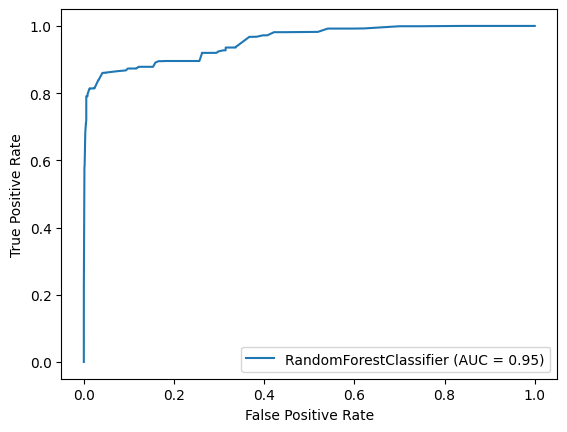

In [84]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve and include the AUC in the label
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'RandomForestClassifier (AUC = {roc_auc:.2f})').plot()
plt.show()

In [85]:
imp_df = pd.DataFrame({
    "Varname": X_train_res.columns,
    "Imp": rf.feature_importances_
})


imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,7.157158e-01
8,category_gas_transport,1.284009e-01
10,category_grocery_pos,4.589788e-02
17,category_shopping_net,2.572316e-02
13,category_kids_pets,1.924752e-02
16,category_personal_care,1.707045e-02
14,category_misc_net,1.260325e-02
15,category_misc_pos,1.063145e-02
19,category_travel,8.082404e-03
7,category_food_dining,4.964701e-03


#### Predicting on Train set

In [86]:
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92   1289169
           1       0.98      0.85      0.91   1289234

    accuracy                           0.91   2578403
   macro avg       0.92      0.91      0.91   2578403
weighted avg       0.92      0.91      0.91   2578403



#### Predicting on Test set

In [88]:
y_test_pred = rf.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.14      0.81      0.24      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.90      0.61    555719
weighted avg       1.00      0.98      0.99    555719



#### Testing model on original data without oversampling

In [90]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [91]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1289169
           1       0.20      0.84      0.32      7506

    accuracy                           0.98   1296675
   macro avg       0.60      0.91      0.65   1296675
weighted avg       0.99      0.98      0.99   1296675

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.14      0.81      0.24      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.90      0.61    555719
weighted avg       1.00      0.98      0.99    555719



In [92]:
ccdf_train.nunique()

,0
trans_date_trans_time,1274791
cc_num,983
merchant,693
category,14
amt,52928
first,352
last,481
gender,2
street,983
city,894


In [93]:
ccdf_train.shape

(1296675, 23)

In [94]:
# Subset of df_train

ccdf_train_merge = ccdf_train[['trans_date_trans_time', 'amt', 'trans_num', 'is_fraud']]
ccdf_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [95]:
ccdf_train_merge.tail()

,trans_date_trans_time,amt,trans_num,is_fraud
1296670,2020-06-21 12:12:08,15.56,440b587732da4dc1a6395aba5fb41669,0
1296671,2020-06-21 12:12:19,51.70,278000d2e0d2277d1de2f890067dcc0a,0
1296672,2020-06-21 12:12:32,105.93,483f52fe67fabef353d552c1e662974c,0
1296673,2020-06-21 12:13:36,74.90,d667cdcbadaaed3da3f4020e83591c83,0
1296674,2020-06-21 12:13:37,4.30,8f7c8e4ab7f25875d753b422917c98c9,0


In [96]:
# Craeting dataframe of y_train_pred

ccdf_train_pred = pd.DataFrame(y_train_pred)
ccdf_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [97]:
# Merging both dataframes

ccdf_train_final = pd.concat([ccdf_train_merge, ccdf_train_pred], axis=1)
ccdf_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [98]:
# renaming the column

ccdf_train_final = ccdf_train_final.rename(columns={0: 'is_fraud_pred'})
ccdf_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [99]:
ccdf_train_final.groupby('is_fraud')['is_fraud'].count()

,is_fraud
is_fraud,
0,1289169
1,7506


In [100]:
ccdf_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

,is_fraud_pred
is_fraud_pred,
0,1264727
1,31948


In [101]:
#Subset of df_test

ccdf_test_merge = ccdf_test[['trans_date_trans_time', 'amt', 'trans_num', 'is_fraud']]
ccdf_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [102]:
# Creating dataframe of y_test_pred

ccdf_test_pred = pd.DataFrame(y_test_pred)
ccdf_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [103]:
# Merging both test dataframes

ccdf_test_final = pd.concat([ccdf_test_merge, ccdf_test_pred], axis=1)
ccdf_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [104]:
# renaming the column

ccdf_test_final = ccdf_test_final.rename(columns={0: 'is_fraud_pred'})
ccdf_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [105]:
ccdf_test_final.groupby('is_fraud')['is_fraud'].count()

,is_fraud
is_fraud,
0,553574
1,2145


In [106]:
ccdf_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

,is_fraud_pred
is_fraud_pred,
0,543103
1,12616


In [108]:
# Merging train and test datasets for cost benefit analysis

ccdf_merge_final = pd.concat([ccdf_train_final, ccdf_test_final], axis=0)
ccdf_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [109]:
ccdf_merge_final.shape

(1852394, 5)

## Cost Benefit Analysis

In [110]:
# Creating Month and year columns

ccdf_merge_final['month'] = pd.DatetimeIndex(ccdf_merge_final['trans_date_trans_time']).month
ccdf_merge_final['year'] = pd.DatetimeIndex(ccdf_merge_final['trans_date_trans_time']).year
ccdf_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [111]:
# Grouping by variable creation

g = ccdf_merge_final.groupby(['year', 'month'])

In [112]:
# Number of transaction per month

g.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [113]:
# Average number of transactions per month

ccdf_merge_final.trans_num.count()/24

77183.08333333333

In [114]:
# Average number of fraudulent transactions per month

ccdf_merge_final[ccdf_merge_final['is_fraud'] == 1].trans_num.count()/24

402.125

In [115]:
# Average amount per fraud transaction

ccdf_merge_final[ccdf_merge_final['is_fraud'] == 1].amt.mean()

530.661412288882

In [116]:
# Average number of transactions per month detected as fraudulent by the model

ccdf_merge_final[ccdf_merge_final['is_fraud_pred'] == 1].trans_num.count()/24

1856.8333333333333

In [117]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = ccdf_merge_final.loc[(ccdf_merge_final['is_fraud_pred'] == 0) & (ccdf_merge_final['is_fraud'] == 1)]
Undetected_frauds.trans_num.count()/24

67.58333333333333